# Moving Average `MA` and `ARMA` models


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "../data/raw"


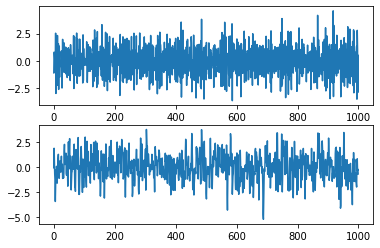

In [2]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()


In [3]:
simulated_data_3 = ArmaProcess([1], [1, -0.3]).generate_sample(nsample=1000)


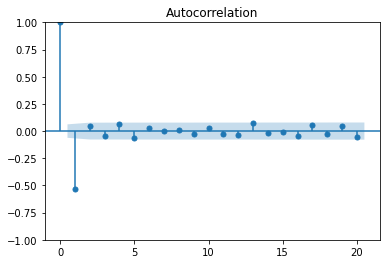

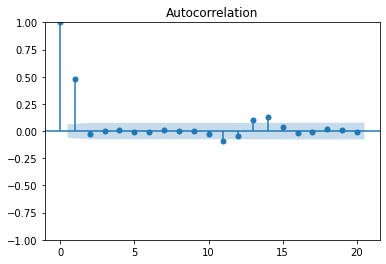

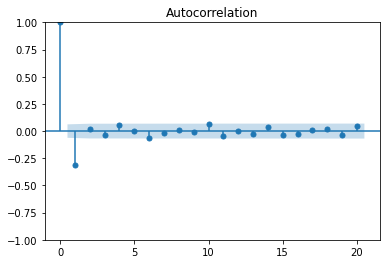

In [4]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()


In [5]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(0, 0, 1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1385.749
Date:                Tue, 01 Mar 2022   AIC                           2777.497
Time:                        23:01:53   BIC                           2792.220
Sample:                             0   HQIC                          2783.093
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.003     -1.543      0.123      -0.011       0.001
ma.L1         -0.9008      0.013    -69.637      0.000      -0.926      -0.875
sigma2         0.9342      0.043     21.933      0.0

In [7]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Forecast the first MA(1) model
mod = ARIMA(simulated_data_1, order=(0, 0, 1))
res = mod.fit()
# res.plot_predict(start=990, end=1010)
plt.show()


In [9]:
import datetime

intraday = pd.read_csv(os.path.join(DATA_PATH, "intraday.csv"))


In [10]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0, 0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ["DATE", "CLOSE"]

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday["DATE"] = pd.to_numeric(intraday["DATE"])

# Make the `DATE` column the new index
intraday = intraday.set_index(["DATE"])


DATE      object
CLOSE    float64
dtype: object


If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389
Missing rows:  {182, 14}


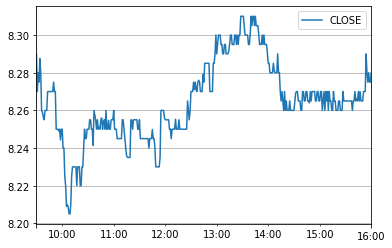

In [11]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

# Fill in the missing rows
intraday = intraday.reindex(range(391), method="ffill")

# Change the index to the intraday times
intraday.index = pd.date_range(
    start="2017-09-01 9:30", end="2017-09-01 16:00", freq="1min"
)

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()


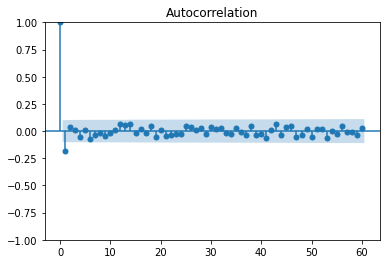

const    -6.832078e-06
ma.L1    -1.717162e-01
sigma2    4.150534e-07
dtype: float64


In [13]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARIMA(returns, order=(0, 0, 1))
res = mod.fit()
print(res.params)


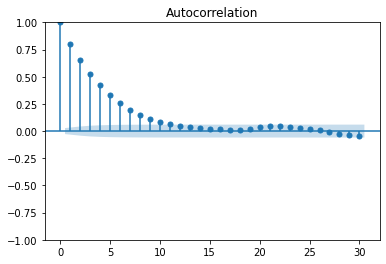

In [14]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()
